# Building Spin-Liqud in Python

## Libraries

In [1]:
from quspin.operators import hamiltonian,quantum_operator # operators
from quspin.basis import spin_basis_general # spin basis constructor
import numpy as np # general math functions

## Parameters, basis and symmetries

In [2]:
Lx, Ly = 5, 2# linear dimension of spin 1 2d lattice
N2d = Lx*Ly  #number of sites for spin 1/2
basis = spin_basis_general(N2d,pauli=0)
no_checks = dict(check_symm=False,check_herm=False,check_pcon=False)

In [3]:
#(np.zeros([3,3]) != 0).any()
spin_basis_general(N2d)
600/60

10.0

## Hamiltonian

In [4]:
def Kitaev_H(alpha = 1, S = None , Js = [1.0,1.0,1.0], J_coup = -1.0 ):
    ''' This function computes the hamiltonian of the Kitaev model coupled 
     to a general localized potentials.The kitaev model by default have a
     size of 5x2, it can be generalized later
    Args:
    ----
    alpha : 1D float, optional 
    This parameter in the kitaev Hamiltonian, it determines the phase 
    
    S : dictionary 
    Contains the local potential to be coupled to each one of the
    spin operators. 
    
    Js: 1D array of floats
    Contains the coupling between each one of the spin components, e.g.
    Js=[J_x, J_y, J_z] -> H = J_xS_x S_x + J_yS_yS_y ....
    j_coup: is the strenght between between the system and the locali_
    zed potentials 
    '''
    # Couplings between spin 
    Jxx,Jyy,Jzz = Js
    # Dictionary that contains the elements 
    sigma_i = S
    # Configugarion 5x2 npbc
    J_yy = [[Jyy,0,1],[Jyy,2,3],[Jyy,6,7],[Jyy,8,9]]
    J_xx = [[Jxx,1,2],[Jxx,3,4],[Jxx,5,6],[Jxx,7,8]]
    J_zz = [[Jzz,5,0],[Jzz,2,7],[Jzz,4,9]]
    # if S is not None:          
    #     J_x = [ [sigma_i[f'Sigma_x_{1}']  ,    6], [sigma_i[f'Sigma_x_{2}']  ,    7]  , [sigma_i[f'Sigma_x_{3}']  ,    8]           ]
    #     J_y = [ [sigma_i[f'Sigma_y_{1}']  ,    6], [sigma_i[f'Sigma_y_{2}']  ,    7]  , [sigma_i[f'Sigma_y_{3}']  ,    8]           ]
    #     J_z = [ [sigma_i[f'Sigma_z_{1}']  ,    6], [sigma_i[f'Sigma_z_{2}']  ,    7]  , [sigma_i[f'Sigma_z_{3}']  ,    8]           ]
    #     operator_list_3 = [["z", J_z  ], ['x', J_x  ],  ['y', J_y  ]    ]
    # Kitaev elements of the couplings
    operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
    # Contain the Heinsenberg elements of each coupling 
    operator_list_1 = [["xx",J_zz],["yy",J_zz],
                      ["xx",J_yy],["zz",J_yy],
                      ["yy",J_xx],["zz",J_xx]]
    # if S is not None:
    #     # Operators to be used
    #     operator_dict = dict(H0=operator_list_0,H1=operator_list_1,Hcoup=operator_list_3)        
    #     # Parameters that acompains each operator 
    #     params_dict = dict(H0 = np.sin(alpha)+np.cos(alpha)
    #                      ,H1 = np.cos(alpha), Hcoup = J_coup)        
    # else:     
    operator_dict = dict(H0=operator_list_0,H1 = operator_list_1)
    params_dict = dict(H0=np.sin(alpha)+np.cos(alpha),H1=np.cos(alpha))
    # Build the hamiltonian in quspin form 
    H = quantum_operator(operator_dict,basis=basis,**no_checks).tohamiltonian(params_dict)
    # Put the parameters in the hamiltonian 
    H_1 = H.tohamiltonian(params_dict)
    return  H_1     

In [5]:
#E_GS, psi_GS = Hamiltonian()

def spin_op(basis=basis, sites=(0,1) ): 
    site1,site2=sites
    sigma = [['zz', [[1.0, site1,site2]]] ,
             ['yy', [[1.0, site1,site2]]],
             ['xx', [[1.0, site1,site2]]]]
    return hamiltonian(sigma,dynamic,
                       dtype=np.float64,basis=basis,**no_checks)
def spin_op_z(basis = basis,sites = 1 ):#sites=(0,1) ):
    site1 = sites
    sigma = [['z', [[1.0, site1]]] ]
    return hamiltonian(sigma,dynamic,
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_x(basis=basis, sites=1 ):
    site1=sites
    sigma = [['x', [[1.0, site1]]] ]
    return hamiltonian(sigma,dynamic,
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_y(basis=basis, sites=1 ):
    site1=sites
    sigma = [['y', [[1.0, site1]]   ]   ] 
    return hamiltonian(sigma,dynamic,
                       dtype=np.complex128,basis=basis,**no_checks)
def Kitaev_correlations(eve):
    correlations=[]
    correlation1=spin_op(sites=(3,2) ).expt_value(eve,check=False)
    correlation2=spin_op(sites=(1,2) ).expt_value(eve,check=False)
    correlation3=spin_op(sites=(7,2) ).expt_value(eve,check=False)
    correlation=correlation1+correlation2+correlation3
    #print('step')
    return correlation

In [6]:
Lx, Ly = 5, 2# linear dimension of spin 1 2d lattice
N2d = Lx*Ly  #number of sites for spin 1/2
basis = spin_basis_general(N2d,pauli=1)
no_checks = dict(check_symm=False,check_herm=False,check_pcon=False)
HBAR = 0.658211928e0
### Hamiltonian
def Kitaev_H(alpha = 1, S = np.zeros([3,3]) , Js = [1.0,1.0,1.0], J_coup = 1.0 ):
    '''This function computes the hamiltonian of the Kitaev model coupled 
    to a general localized potentials.The kitaev model by default have a
    size of 5x2, it can be generalized later
    Args:
    ----
    alpha : 1D float, optional 
    This parameter in the kitaev Hamiltonian, it determines the phase 
    S : dictionary 
    Contains the local potential to be coupled to each one of the
    spin operators. 
    Js: 1D array of floats
    Contains the coupling between each one of the spin components, e.g.
    Js=[J_x, J_y, J_z] -> H = J_xS_x S_x + J_yS_yS_y ....
    j_coup: is the strenght between between the system and the locali_
    zed potentials 
    '''
    ##print("join0 " ,S )
    # Couplings between spin 
    Jxx,Jyy,Jzz = Js                                ### Magnitude of the coupling 
    # Configugarion 5x2 npbc
    J_yy = [[Jyy,0,1],[Jyy,2,3],[Jyy,6,7],[Jyy,8,9]]
    J_xx = [[Jxx,1,2],[Jxx,3,4],[Jxx,5,6],[Jxx,7,8]]
    J_zz = [[Jzz,5,0],[Jzz,2,7],[Jzz,4,9]]
    operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
    # Contain the Heinsenberg elements of each coupling 
    J_yxx = [[Jxx,0,1],[Jxx,2,3],[Jxx,6,7],[Jxx,8,9]]
    J_yzz = [[Jzz,0,1],[Jzz,2,3],[Jzz,6,7],[Jzz,8,9]]
    J_xyy = [[Jyy,1,2],[Jyy,3,4],[Jyy,5,6],[Jyy,7,8]]
    J_xzz = [[Jzz,1,2],[Jzz,3,4],[Jzz,5,6],[Jzz,7,8]]
    J_zxx = [[Jxx,5,0],[Jxx,2,7],[Jxx,4,9]]
    J_zyy = [[Jyy,5,0],[Jyy,2,7],[Jyy,4,9]]
    operator_list_1 = [["xx",J_zxx],["yy",J_zyy],
                      ["xx",J_yxx],["zz",J_yzz],
                      ["yy",J_xyy],["zz",J_xzz]]
    operator_dict = dict(H0=operator_list_0,H1 = operator_list_1)
    ### Parameter that controls the HK model 
    params_dict = dict(H0=np.sin(alpha)+np.cos(alpha),H1=np.cos(alpha))
    #(np.zeros([3,3]) !== 0).any()
    #[:,1]
    # print("bool_val :",(S != 0).any())
    if (S != 0.).any() :
        ##print("join " ,S )
        J_x = [ [S[0,0] , 6], [S[0,1]  , 7], [S[0,2],  8]  ]
        J_y = [ [S[1,0] , 6], [S[1,1]  , 7], [S[1,2],  8]  ]
        J_z = [ [S[2,0] , 6], [S[2,1]  , 7], [S[2,2],  8]  ]
        operator_list_3 = [["z", J_z  ], ['x', J_x  ], ['y', J_y ] ]
        operator_dict = dict(H0=operator_list_0,H1=operator_list_1,Hcoup=operator_list_3)
        params_dict = dict(H0=np.sin(alpha)+np.cos(alpha),H1=np.cos(alpha), Hcoup = -J_coup)

    ##print(operator_dict)
    ##print(params_dict)
    # Build the hamiltonian in quspin form 
    H = quantum_operator(operator_dict,basis=basis,dtype=np.complex128,**no_checks)
    # Put the parameters in the hamiltonian 
    H_1 = H.tohamiltonian(params_dict)
    return  H_1     

### Operators 

def spin_op(basis=basis, sites=(0,1) ): 
    site1,site2=sites
    sigma = [['zz', [[1.0, site1,site2]]] ,
             ['yy', [[1.0, site1,site2]]],
             ['xx', [[1.0, site1,site2]]]]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_z(basis = basis,sites = 1 ):#sites=(0,1) ):
    site1 = sites
    sigma = [['z', [[1.0, site1]]] ]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_x(basis=basis, sites=1 ):
    site1=sites
    sigma = [['x', [[1.0, site1]]] ]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_y(basis=basis, sites=1 ):
    site1=sites
    sigma = [['y', [[1.0, site1]]   ]   ] 
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)

def spindensity_qsl(psi,sites=[5,6,7]):
    sden= []
    for site in sites:
        S_x = spin_op_x(sites = site).expt_value(V = psi)#.toarray()
        S_y = spin_op_y(sites = site).expt_value(V = psi)#.toarray()
        S_z = spin_op_z(sites = site).expt_value(V = psi)#.toarray()
        sden.append([S_x, S_y, S_z])
    return sden

def Kitaev_correlations(eve):
    correlations=[]
    correlation1=spin_op(sites=(3,2) ).expt_value(eve,check=False)
    correlation2=spin_op(sites=(1,2) ).expt_value(eve,check=False)
    correlation3=spin_op(sites=(7,2) ).expt_value(eve,check=False)
    correlation=correlation1+correlation2+correlation3
    #print('step')
    return correlation

   

In [89]:
E_Sl, psi_Sl = np.linalg.eig(Kitaev_H(alpha=3*np.pi/2, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) ### eigh tiene problmes
E_Fe, psi_Fe = np.linalg.eig(Kitaev_H(alpha=np.pi, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) ### eigh tiene problmes
E_Af, psi_Af = np.linalg.eig(Kitaev_H(alpha=0., Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) ### eigh tiene problmes
#E_S, psi_S = Kitaev_H(alpha=np.pi, Js = [0.,0.,1.],J_coup = 0.0 ).eigh()#eigsh(k=1,which="SA",maxiter=1E4)#.eigh()
#psi_S = eigen(Kf.Kitaev_H(alpha=pi, Js = [0.,1.,0.],J_coup = 0.0 ).toarray() ).vectors
#Kf.Kitaev_H(alpha=pi, Js = [0.,0.,1.],J_coup = 0.0 ).eigh()#.eigsh(k=30,which="SA",maxiter=1E8)
#np.linalg.eigh(Kf.Kitaev_H(alpha=pi, Js = [0.,1.,0.],J_coup = 0.0 ).toarray())
##.eigh()#.eigsh(k=1,which="SA",maxiter=1E4)#.eigh()#.eigsh(k = 1,which = "SA")#.eigh()#.eigsh(k = 1,which = "SA") #.eigh()#.eigsh(which = "SA")#
psi_GS = psi_S[:,0] 
#Kf.basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1)["Sent_A"][1]
A=[0,1,2,3,4]
ssden = []
for i in range(9):
    S_z = spin_op_z(sites = i).expt_value(V = psi_GS).real#.toarray()
    S_x = spin_op_x(sites = i).expt_value(V = psi_GS).real#.toarray()
    S_y = spin_op_y(sites = i).expt_value(V = psi_GS).real#.toarray()
    #S_eq.append([np.real(S_x_v), np.real(S_y_v), np.real(S_z_v)])
    ssden.append( [S_x,S_y,S_z] ) 
    print([S_x,S_y,S_z]  )
#### Check if the GS is FM

ennt= basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1,density=True)["Sent_A"]#[0]
ennt

[-2.4246906417843902e-15, -9.716663609733643e-33, -5.278031700930997e-16]
[3.3371938774452682e-15, 1.0737227460173483e-32, 8.044644594570881e-16]
[-3.839555358550384e-15, -1.1573189565492822e-32, -3.4739192859151184e-16]
[5.045150289518875e-15, 1.142507217323443e-32, 1.3572855946802894e-16]
[-5.205990519749796e-15, -1.01941602254445e-32, -2.8548398454258953e-16]
[2.9553272875185287e-15, 1.069715368596441e-32, 4.3713676341899917e-16]
[-2.6830659915673226e-15, -1.1433150948151186e-32, -7.425836204624782e-16]
[3.7015430907173286e-15, 1.0982342518711105e-32, 6.150272348695586e-16]
[-4.575184737063817e-15, -1.1635919045397372e-32, -3.462806213647142e-16]


array(0.25774461)

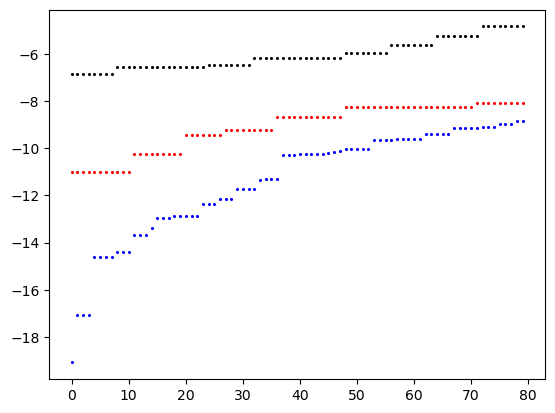

In [70]:
import matplotlib.pyplot as plt
tot = 80

plt.scatter(np.arange(0,tot),np.sort(E_Sl)[0:tot], s=1.5,color='black')

plt.scatter(np.arange(0,tot),np.sort(E_Fe)[0:tot], s=1.5,color='red')

plt.scatter(np.arange(0,tot),np.sort(E_Af)[0:tot], s=1.5,color='blue')

In [108]:
np.real(np.sort(E_Af)[0]) == np.real(E_Af[0])

True

In [106]:
np.real(E_Af)[0]

-19.07993881985918

In [107]:
np.real(np.sort(E_Af))[0]

-19.07993881985918

In [92]:
sden_Sl = np.real(spindensity_qsl(psi=psi_Sl[:,0],sites=[0,1,2,3,4,5,6,7,8,9]))
sden_Sl
basis.ent_entropy(psi_Sl[:,0] ,sub_sys_A=A,alpha=1,density=True)["Sent_A"]

array(0.33789455)

In [91]:
sden_Fe = np.real(spindensity_qsl(psi=psi_Fe[:,1],sites=[0,1,2,3,4,5,6,7,8,9]))
sden_Fe
basis.ent_entropy(psi_Fe[:,0] ,sub_sys_A=A,alpha=1,density=True)["Sent_A"]

array(4.95760435e-14)

In [94]:
sden_Af = np.real(spindensity_qsl(psi=psi_Af[:,2],sites=[0,1,2,3,4,5,6,7,8,9]))
sden_Af
basis.ent_entropy(psi_Af[:,0] ,sub_sys_A=A,alpha=1,density=True)["Sent_A"]

array(0.25774461)

IndexError: index 3 is out of bounds for axis 1 with size 3

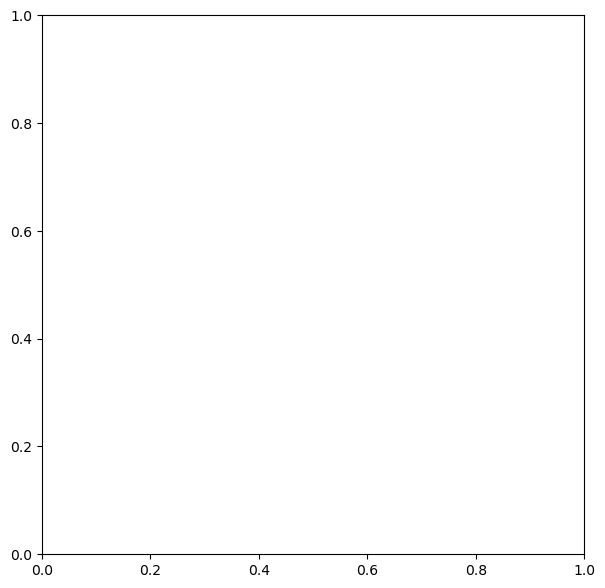

In [74]:
fig,axes=plt.subplots(1,1,figsize=(7,7))
fs =20
for i in range(3,31,3):
    plt.plot(sden[:,i],label=f"$site={i//3}$")
plt.legend()  
axes.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6)
axes.set_ylabel(r'$\mathrm{\langle \hat s^z_i \rangle}$',fontsize=fs)
axes.set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes.legend(frameon=False)

(array([0.02569502, 0.00899326, 0.02697977, 0.0578138 , 0.02312552,
        0.06166805, 0.04625104, 0.05395955, 0.04625104, 0.07708507,
        0.04625104, 0.06809181, 0.06166805, 0.09121733, 0.03982728,
        0.06680706, 0.05395955, 0.07066131, 0.06295281, 0.03597303,
        0.04496629, 0.03725778, 0.04625104, 0.03340353, 0.01541701,
        0.02697977, 0.01798652, 0.02055602, 0.005139  , 0.01156276]),
 array([-11.        , -10.22163913,  -9.44327827,  -8.6649174 ,
         -7.88655654,  -7.10819567,  -6.3298348 ,  -5.55147394,
         -4.77311307,  -3.99475221,  -3.21639134,  -2.43803047,
         -1.65966961,  -0.88130874,  -0.10294788,   0.67541299,
          1.45377386,   2.23213472,   3.01049559,   3.78885645,
          4.56721732,   5.34557818,   6.12393905,   6.90229992,
          7.68066078,   8.45902165,   9.23738251,  10.01574338,
         10.79410425,  11.57246511,  12.35082598]),
 <BarContainer object of 30 artists>)

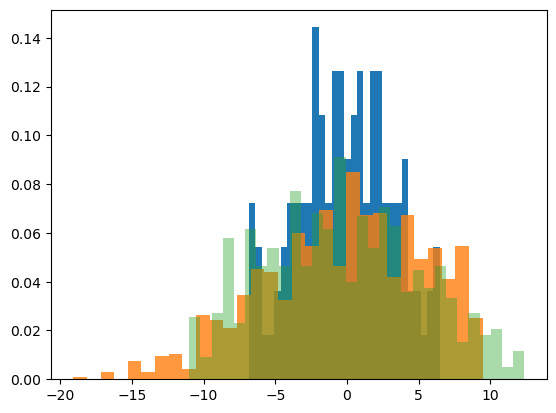

In [54]:
tot = 1000
plt.hist(np.sort(E_Sl)[0:tot],30,density=1)
plt.hist(np.sort(E_Af)[0:tot],30,density=1,alpha=0.8)
plt.hist(np.sort(E_Fe)[0:tot],30,density=1,alpha=0.4)

(0.0, 0.5)

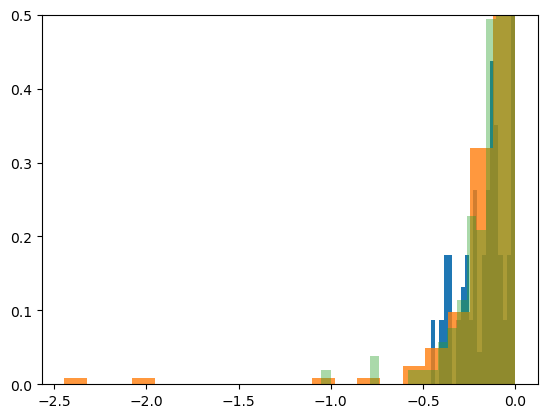

In [63]:
tot = 1000

plt.hist(np.sort(E_Sl)[0:tot]-np.sort(E_Sl)[1:tot+1] ,20,density=1)
plt.hist(np.sort(E_Af)[0:tot]-np.sort(E_Af)[1:tot+1],20,density=1,alpha=0.8)
plt.hist(np.sort(E_Fe)[0:tot]-np.sort(E_Fe)[1:tot+1],20,density=1,alpha=0.4)

plt.ylim([0,0.5])

In [66]:
#np.linalg.norm(psi_GS)

# E_S, psi_S = Kitaev_H(alpha=1.).eigh()#.eigsh(which = "SA")#.eigsh(k = 1,which = "SA") 
# psi_GS = psi_S[:,1] ;

# spindensity_qsl(psi=psi_GS)#[1,:]
#Kitaev_H(alpha=np.pi, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()
#E_S[0:5]

# Evolution of the G.S

In [109]:
#### Function to evolve the system 

def evolve(H_static, H_dynamic, psi, dt, method='diag', time_dep=0):
    """a function to evolve the wave function in time
    if time independet, we return Ut and should be called outside
    the loop
    """
    size = H_static.shape[0]
    if method == 'gpu' or method == 'CN_gpu':
        import pycuda.gpuarray as gpuarray
        import pycuda.autoinit
#         from skcuda import linalg
#         from skcuda import misc
#         linalg.init()
    if not time_dep:
        if method=='expm': 
            Ut = la.expm(-1j*H_static.toarray()*dt/HBAR)
            return Ut
        elif method=='eig_vec':
            w,v = la.eigh(H_static.toarray())
            Ut = np.asarray([np.exp(-1j*w[i]*dt) for i in range(size)])
            return Ut
        elif method=='CN':
#             Ut = sla.inv((eye(size) + 1j*dt*H_static/(2*HBAR)).tocsc()) @ \
#                        (eye(size) - 1j*dt*H_static/(2*HBAR))
            Ut = la.inv(( np.eye(size) + 1j*dt*H_static.toarray()/(2*HBAR))) @ \
                       ( np.eye(size) - 1j*dt*H_static.toarray()/(2*HBAR))
            return Ut@psi
            
        elif method=='CN_spilu':
            B = sla.spilu(eye(size) + 1j*dt*H_static/(2*HBAR))
            return B
    
        elif method=='CN_gpu':
            mat      = (eye(size) + 1j*dt*H_static/(2*HBAR))
            a_gpu    = gpuarray.to_gpu(mat.toarray()) 
            ainv_gpu = linalg.inv(a_gpu, overwrite=True)
            mat_inv  = ainv_gpu.get()
            Ut       = mat_inv @ (eye(size) - 1j*dt*H_static/(2*HBAR))
            return Ut
    else: 
        if method=='expm': 
            Ht = H_static + H_dynamic
            Ut = la.expm(-1j*Ht.toarray()*dt/HBAR)
            psi_new = Ut @ psi
            return psi

        elif method=='CN':
            Ht = H_static + H_dynamic
            Ut = sla.inv(eye(size) + 1j*dt*Ht/(2*HBAR)) @ \
                        (eye(size) - 1j*dt*Ht/(2*HBAR))
            psi = Ut @ psi
            return psi
            
        if method=='eig_vec':
            Ht = H_static + H_dynamic
            w, v = la.eigh(Ht.toarray())
            Ut = np.asarray([np.exp(-1j*w[i]*dt) for i in range(2)])
            cn = [v[:,i].conj() @ psi for i in range(2)]
            psi = np.sum([cn[i] * (Ut[i] * v[:,i]) for i in range(2)], axis=0)
            return psi

        elif method=='CN_gpu':
            Ht = H_static + H_dynamic
            mat      = (eye(size) + 1j*dt*Ht/(2*HBAR))
            a_gpu    = gpuarray.to_gpu(mat.toarray()) 
            ainv_gpu = linalg.inv(a_gpu, overwrite=True)
            mat_inv  = ainv_gpu.get()
            Ut       = mat_inv @ (eye(size) - 1j*dt*Ht/(2*HBAR))
            psi = Ut @ psi
            return psi


In [173]:

import scipy.linalg as la
import scipy.sparse.linalg as sla
angle=np.pi
E_Fe, psi_Fe = np.linalg.eig(Kitaev_H(alpha=angle, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) ### eigh tiene problmes
indices_orden = np.argsort(np.real(E_Fe) )
H_k = Kitaev_H(alpha = angle, Js = [1.,1.,1.],J_coup = 	0.0)
psi_GS = psi_Fe[:,indices_orden[10]]

psi_GS


array([-3.83742376e-19-6.55450579e-20j, -4.91290866e-04-3.15978686e-06j,
       -4.91290866e-04-3.15978685e-06j, ...,
       -1.99040742e-14-1.44021430e-15j, -1.99040903e-14-1.44020867e-15j,
       -5.65607594e-18-1.36029681e-18j])

In [174]:

sden= []
for t in np.arange(0,100,0.1):
    print('time step:' , t)
    sden_save= spindensity_qsl(psi=psi_GS,sites=[0,1,2,3,4,5,6,7,8,9])
    #print(sden_save[0])
    
    sden.append(sden_save)#= #[sden_save[i] for i in range(0,9) ]
    psi_GS = evolve(H_static=H_k, H_dynamic=[], psi=psi_GS, dt=0.1, method= "CN", time_dep=0) 


time step: 0.0
time step: 0.1
time step: 0.2
time step: 0.30000000000000004
time step: 0.4
time step: 0.5
time step: 0.6000000000000001
time step: 0.7000000000000001
time step: 0.8
time step: 0.9
time step: 1.0
time step: 1.1
time step: 1.2000000000000002
time step: 1.3
time step: 1.4000000000000001
time step: 1.5
time step: 1.6
time step: 1.7000000000000002
time step: 1.8
time step: 1.9000000000000001
time step: 2.0
time step: 2.1
time step: 2.2
time step: 2.3000000000000003
time step: 2.4000000000000004
time step: 2.5
time step: 2.6
time step: 2.7
time step: 2.8000000000000003
time step: 2.9000000000000004
time step: 3.0
time step: 3.1
time step: 3.2
time step: 3.3000000000000003
time step: 3.4000000000000004
time step: 3.5
time step: 3.6
time step: 3.7
time step: 3.8000000000000003
time step: 3.9000000000000004
time step: 4.0
time step: 4.1000000000000005
time step: 4.2
time step: 4.3
time step: 4.4
time step: 4.5
time step: 4.6000000000000005
time step: 4.7
time step: 4.80000000000

In [175]:
# site1 = 0
# dynamic = []
# sigma = [['z', [[1.0, site1]]] ]

# sx = hamiltonian(sigma,dynamic,dtype=np.complex128,basis=basis,**no_checks)
sz1_t= [sden[t][0][2] for t in np.arange(100)]
sz2_t= [sden[t][1][2] for t in np.arange(100)]
sz3_t= [sden[t][2][2] for t in np.arange(100)]
sz4_t= [sden[t][3][2] for t in np.arange(100)]
sz5_t= [sden[t][4][2] for t in np.arange(100)]
sz6_t= [sden[t][5][2] for t in np.arange(100)]
sz7_t= [sden[t][6][2] for t in np.arange(100)]
sz8_t= [sden[t][7][2] for t in np.arange(100)]
sz9_t= [sden[t][8][2] for t in np.arange(100)]
sz10_t= [sden[t][9][2] for t in np.arange(100)]



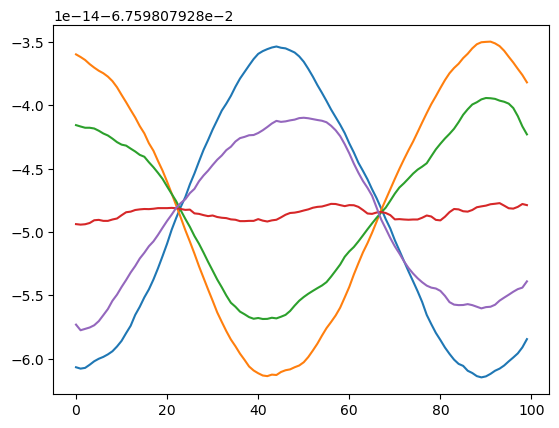

In [182]:
plt.plot(sz6_t)
plt.plot(sz5_t)
plt.plot(sz4_t)
plt.plot(sz3_t)
plt.plot(sz2_t)

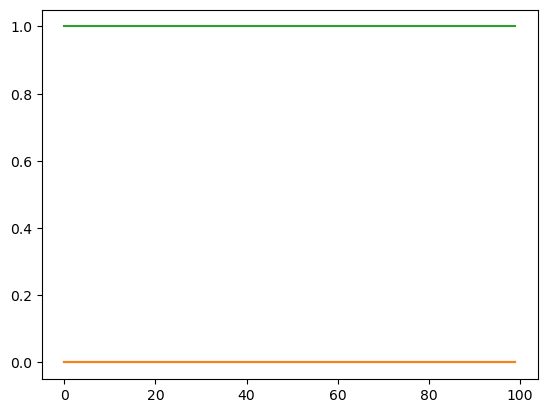

In [161]:
plt.plot(sz1_t)
#plt.plot(sz2_t)

In [16]:
# # Define parameters
# L = 6  # Number of spins
# J = 1.0  # Exchange coupling constant

# # Create spin basis
# basis = spin_basis_general(L,pauli=0)

# # Define Heisenberg Hamiltonian
# J_matrix = [[J, i, (i + 1) % L] for i in range(L)]
# static = [["xx", J_matrix], ["yy", J_matrix], ["zz", J_matrix]]
# H = hamiltonian(static, [], basis=basis, dtype=np.float64)

# # Diagonalize the Hamiltonian
# E, psi = H.eigh()
# A=[0,1,2,3,4]
# #print("Eigenenergies:", E)
# basis.ent_entropy(psi[1,:] ,sub_sys_A=A,alpha=1)["Sent_A"]#[1]

sden

Hermiticity check passed!
Symmetry checks passed!


array(0.12730283)

In [15]:
#psi[:,1]

array([ 0.00000000e+00,  0.00000000e+00, -4.75857457e-16, -1.12837010e-01,
        5.58448221e-16,  2.95411127e-01, -1.12837010e-01,  4.28121595e-05,
        1.38777878e-17, -3.65148234e-01,  2.95411127e-01, -1.12083689e-04,
       -1.12837010e-01, -1.12083689e-04,  4.28121595e-05,  2.64913776e-07,
       -5.82231105e-16,  2.95411127e-01, -3.65148234e-01, -1.12083689e-04,
        2.95411127e-01,  5.44065654e-04, -1.12083689e-04, -6.93553269e-07,
       -1.12837010e-01, -1.12083689e-04, -1.12083689e-04,  8.57278986e-07,
        4.28121595e-05, -6.93553269e-07,  2.64913776e-07,  0.00000000e+00,
        4.75857457e-16, -1.12837010e-01,  2.95411127e-01,  4.28121595e-05,
       -3.65148234e-01, -1.12083689e-04, -1.12083689e-04,  2.64913776e-07,
        2.95411127e-01, -1.12083689e-04,  5.44065654e-04, -6.93553269e-07,
       -1.12083689e-04,  8.57278986e-07, -6.93553269e-07, -1.72313225e-26,
       -1.12837010e-01,  4.28121595e-05, -1.12083689e-04,  2.64913776e-07,
       -1.12083689e-04, -